# Image Classification using Keras

### Few Remarks:
## If you enjoy it, please vote it up, and if you have any recommendations, please leave them in the comments.

In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from PIL import Image
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
image_gen = ImageDataGenerator(rotation_range=25,
                              width_shift_range=0.1,
                              height_shift_range=0.1,rescale=1/255,shear_range=0.2,
                              zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [4]:
path = "/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/0.jpg"

In [5]:
def display_img(path):
    plt.figure(figsize=(2,2))
    read = cv2.imread(path)
    read_cvt = cv2.cvtColor(read ,cv2.COLOR_BGR2RGB)
    plt.imshow(read_cvt)
    plt.show()

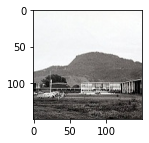

In [6]:
display_img(path)

In [7]:
image_gen.flow_from_directory("/kaggle/input/intel-image-classification/seg_train/seg_train")

Found 14034 images belonging to 6 classes.


In [8]:
model = Sequential()

2023-02-04 19:48:32.782010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 19:48:32.883889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 19:48:32.884785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 19:48:32.886610: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       2

In [11]:
training_image =image_gen.flow_from_directory("/kaggle/input/intel-image-classification/seg_train/seg_train" , 
                                              target_size=(150,150),batch_size=25)

Found 14034 images belonging to 6 classes.


In [12]:
testing_image =image_gen.flow_from_directory("/kaggle/input/intel-image-classification/seg_test/seg_test" , 
                                              target_size=(150,150),batch_size=25)

Found 3000 images belonging to 6 classes.


In [13]:
steps_per_epoch = 14034//32
validation_steps =14034//32

history = model.fit_generator(generator=training_image,
                              steps_per_epoch=steps_per_epoch,
                              epochs=100,
                              validation_data=testing_image,
                              validation_steps=validation_steps)


2023-02-04 19:48:40.461174: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-02-04 19:48:42.561786: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


438/438 [==============================] - 160s 347ms/step - loss: 1.3215 - accuracy: 0.5628 - val_loss: 1.6571 - val_accuracy: 0.4207
Epoch 2/100
438/438 [==============================] - 100s 229ms/step - loss: 0.9263 - accuracy: 0.6662
Epoch 3/100
438/438 [==============================] - 74s 170ms/step - loss: 0.8100 - accuracy: 0.7054
Epoch 4/100
438/438 [==============================] - 73s 166ms/step - loss: 0.7043 - accuracy: 0.7424
Epoch 5/100
438/438 [==============================] - 72s 165ms/step - loss: 0.6501 - accuracy: 0.7659
Epoch 6/100
438/438 [==============================] - 95s 218ms/step - loss: 0.6240 - accuracy: 0.7786
Epoch 7/100
438/438 [==============================] - 72s 164ms/step - loss: 0.5899 - accuracy: 0.7883
Epoch 8/100
438/438 [==============================] - 72s 164ms/step - loss: 0.5654 - accuracy: 0.8040
Epoch 9/100
438/438 [==============================] - 71s 161ms/step - loss: 0.5258 - accuracy: 0.8124
Epoch 10/100
438/438 [==========

In [14]:
# model.save("image_class.h5")

In [15]:
def processing(path):
    img = cv2.imread(path)
    test1_proc = image.load_img(path , target_size=(150,150))
    test1_proc_1 = image.img_to_array(test1_proc)
    t1 = np.expand_dims(test1_proc ,axis=0)
    t1 = t1/255
    pred_classes = model.predict(t1)
    pred = np.argmax(pred_classes ,axis=1)

    plt.subplot(121)
    pic = Image.open(path) 
    plt.xlabel("Original Image")
    plt.imshow(pic)
    
    
    plt.subplot(122)
    
    s1 = pd.Series(pred_classes.ravel() , index = training_image.class_indices.keys())
    s1.plot(kind = 'bar' ,figsize = (10,5))
    plt.xlabel("prediction")
    
    plt.show()

    for i in training_image.class_indices:
        if pred == training_image.class_indices[i]:
            print("prediction made by model is :" ,i)


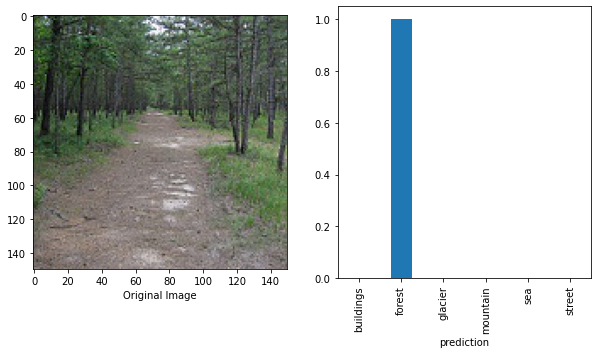

prediction made by model is : forest


In [16]:
processing("/kaggle/input/intel-image-classification/seg_test/seg_test/forest/20056.jpg")

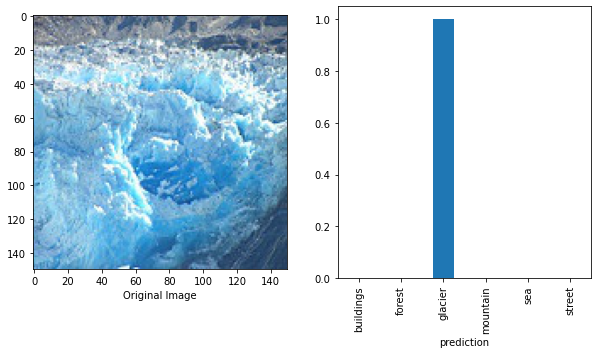

prediction made by model is : glacier


In [17]:
processing("/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20087.jpg")

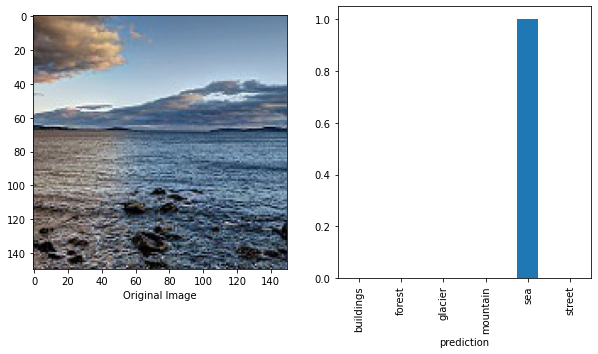

prediction made by model is : sea


In [18]:
processing("/kaggle/input/intel-image-classification/seg_test/seg_test/sea/20114.jpg")

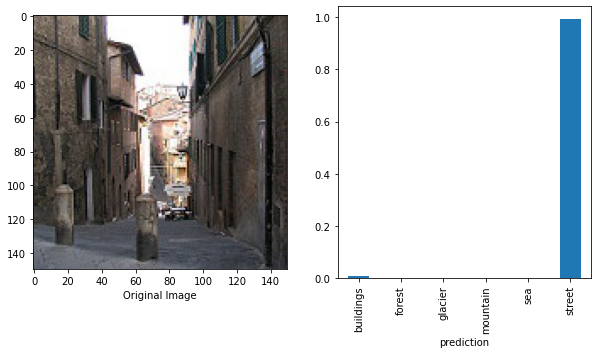

prediction made by model is : street


In [19]:
processing("/kaggle/input/intel-image-classification/seg_test/seg_test/street/20090.jpg")

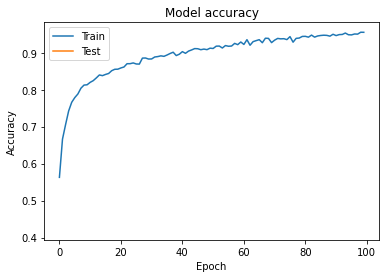

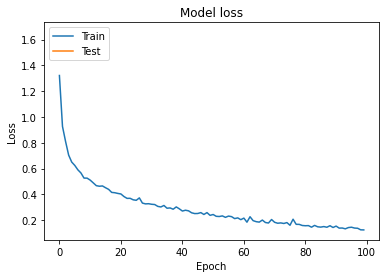

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()